# rigidregistration: Quick walk through
The code below provides a quick walk-through demonstrating use of the rigidregistration python package.

If you find this code useful in your own research, please cite the associated publication:
"Image registration of low signal-to-noise cryo-STEM data", Ultramicroscopy (2018), DOI: 10.1016/j.ultramic.2018.04.008

### Getting started
In this example, data which is formatted as .tif files are loaded using the tifffile package.  For other file formats common to electron microscopy data (e.g., .dm3, .ser...) we recommend the excellent hyperspy package for i/o handling.  See hyperspy.org.

In [2]:
# Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread
import rigidregistration
import os

%matplotlib inline

In [113]:
# Load data and instantiate imstack object  

datadir = "../../data/20210602_CrSBr/stacks/"

if not (os.path.isdir( datadir+"registered")):
    os.mkdir( datadir+"registered")
fname = "1854_300keV_7C_12cm_10Mx_22mrad_1p2us_40frames"

f= datadir+fname + ".tif"                # Filepath to data
stack=np.rollaxis(imread(f),0,3)/float(2**16)           # Rearrange axes and normalize data
s=rigidregistration.stackregistration.imstack(stack)    # Instantiage imstack object.
s.getFFTs() 

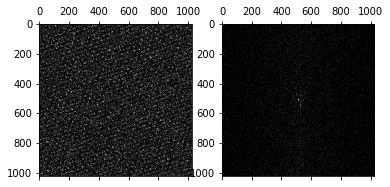

In [76]:
# Inspect data in preparation for registration

for i in range(5,6):                      # Select which images from the stack to display
    fig,(ax1,ax2)=plt.subplots(1,2)
    ax1.matshow(stack[:,:,i],cmap='gray')
    ax2.matshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(stack[:,:,i])))),cmap='gray',vmin=np.average(np.log(np.abs(np.fft.fft2(stack[:,:,i]))))) 
    ax1.grid(False)
    ax2.grid(False)
    plt.show()

### Fourier masking
A Fourier mask is used to avoid incorrect cross correlations, by weighting more trustworthy information in frequency space more heavily.

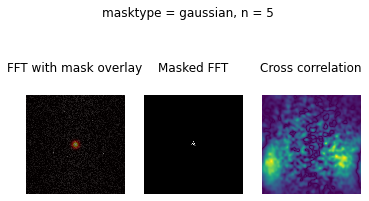

In [122]:
# Choose best mask

masktype="gaussian"
n=5

s.makeFourierMask(mask=masktype,n=n)
s.show_Fourier_mask(i=i,j=j)

### Calculate image shifts
Calculate the relative shifts between all pairs of images from their cross correlations.

In [123]:
s.findImageShifts(findMaxima='gf',verbose=True);     # Find shifts. 

Correlating images 0 and 1
Correlating images 0 and 2
Correlating images 0 and 3
Correlating images 0 and 4
Correlating images 0 and 5
Correlating images 0 and 6
Correlating images 0 and 7
Correlating images 0 and 8
Correlating images 0 and 9
Correlating images 0 and 10
Correlating images 0 and 11
Correlating images 0 and 12
Correlating images 0 and 13
Correlating images 0 and 14
Correlating images 0 and 15
Correlating images 0 and 16
Correlating images 0 and 17
Correlating images 0 and 18
Correlating images 0 and 19
Correlating images 0 and 20
Correlating images 0 and 21
Correlating images 0 and 22
Correlating images 0 and 23
Correlating images 0 and 24
Correlating images 0 and 25
Correlating images 0 and 26
Correlating images 0 and 27
Correlating images 0 and 28
Correlating images 0 and 29
Correlating images 0 and 30
Correlating images 0 and 31
Correlating images 0 and 32
Correlating images 0 and 33
Correlating images 0 and 34
Correlating images 0 and 35
Correlating images 0 and 36
C

Correlating images 8 and 20
Correlating images 8 and 21
Correlating images 8 and 22
Correlating images 8 and 23
Correlating images 8 and 24
Correlating images 8 and 25
Correlating images 8 and 26
Correlating images 8 and 27
Correlating images 8 and 28
Correlating images 8 and 29
Correlating images 8 and 30
Correlating images 8 and 31
Correlating images 8 and 32
Correlating images 8 and 33
Correlating images 8 and 34
Correlating images 8 and 35
Correlating images 8 and 36
Correlating images 8 and 37
Correlating images 8 and 38
Correlating images 8 and 39
Correlating images 9 and 10
Correlating images 9 and 11
Correlating images 9 and 12
Correlating images 9 and 13
Correlating images 9 and 14
Correlating images 9 and 15
Correlating images 9 and 16
Correlating images 9 and 17
Correlating images 9 and 18
Correlating images 9 and 19
Correlating images 9 and 20
Correlating images 9 and 21
Correlating images 9 and 22
Correlating images 9 and 23
Correlating images 9 and 24
Correlating images 9

Correlating images 19 and 35
Correlating images 19 and 36
Correlating images 19 and 37
Correlating images 19 and 38
Correlating images 19 and 39
Correlating images 20 and 21
Correlating images 20 and 22
Correlating images 20 and 23
Correlating images 20 and 24
Correlating images 20 and 25
Correlating images 20 and 26
Correlating images 20 and 27
Correlating images 20 and 28
Correlating images 20 and 29
Correlating images 20 and 30
Correlating images 20 and 31
Correlating images 20 and 32
Correlating images 20 and 33
Correlating images 20 and 34
Correlating images 20 and 35
Correlating images 20 and 36
Correlating images 20 and 37
Correlating images 20 and 38
Correlating images 20 and 39
Correlating images 21 and 22
Correlating images 21 and 23
Correlating images 21 and 24
Correlating images 21 and 25
Correlating images 21 and 26
Correlating images 21 and 27
Correlating images 21 and 28
Correlating images 21 and 29
Correlating images 21 and 30
Correlating images 21 and 31
Correlating im

### Find and correct outliers in shift matrix
The previous step determines the relative shifts between all pairs of images.  Here, any incorrectly calculated shifts -- which may result from noisy, low SNR data -- are identified and corrected.  First, the shift matrix is displayed and inspected.  Next, outliers are identified.  Outliers are then corrected.

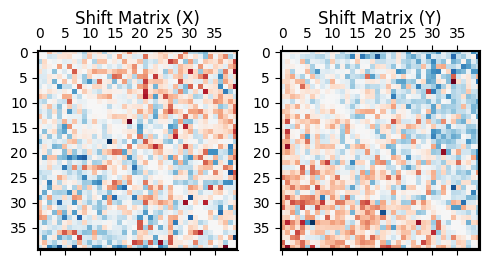

In [124]:
# Show Xij and Yij matrices

s.show_Rij()

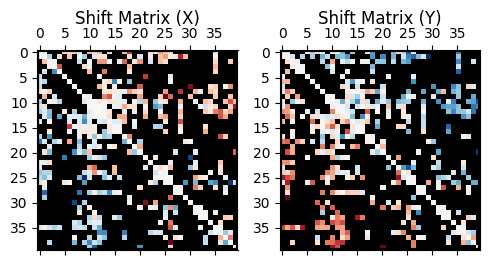

In [125]:
# Identify outliers

s.get_outliers(threshold=30)              # Set outlier threshhold
s.show_Rij()

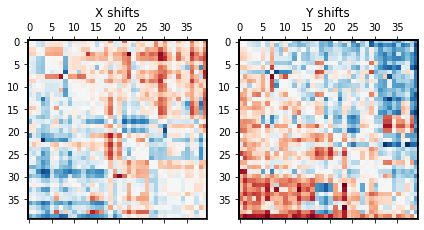

In [126]:
# Correct outliers

s.make_corrected_Rij()    # Correct outliers using the transitivity relations
s.show_Rij_c()            # Display the corrected shift matrix

### Calculate average image

To obtain the average image, each image in the stack is shifted by an amount which is calculated from the shift matrix.  The entire, shifted image stack is then averaged. 

Several functions are available for displaying and saving the resulting average image, and for summarizing the processing that's been applied to the data for quick review.

In [ ]:
# Create registered image stack and average

s.get_averaged_image()

# Save the registered stack

s.save_registered_stack( datadir+"registered/"+ fname +".tif")